In [1]:
!pip install pyspark seaborn matplotlib pandas

In [2]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
spark = SparkSession.builder.appName("CrimeAnalysisIndia").getOrCreate()

In [4]:
from google.colab import files
uploaded = files.upload()

Saving 01_District_wise_crimes_committed_IPC_2001_2012.csv to 01_District_wise_crimes_committed_IPC_2001_2012.csv


In [5]:
df = spark.read.csv("01_District_wise_crimes_committed_IPC_2001_2012.csv", header=True, inferSchema=True)
df.printSchema()
df.show(5)

root
 |-- STATE/UT: string (nullable = true)
 |-- DISTRICT: string (nullable = true)
 |-- YEAR: integer (nullable = true)
 |-- MURDER: integer (nullable = true)
 |-- ATTEMPT TO MURDER: integer (nullable = true)
 |-- CULPABLE HOMICIDE NOT AMOUNTING TO MURDER: integer (nullable = true)
 |-- RAPE: integer (nullable = true)
 |-- CUSTODIAL RAPE: integer (nullable = true)
 |-- OTHER RAPE: integer (nullable = true)
 |-- KIDNAPPING & ABDUCTION: integer (nullable = true)
 |-- KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS: integer (nullable = true)
 |-- KIDNAPPING AND ABDUCTION OF OTHERS: integer (nullable = true)
 |-- DACOITY: integer (nullable = true)
 |-- PREPARATION AND ASSEMBLY FOR DACOITY: integer (nullable = true)
 |-- ROBBERY: integer (nullable = true)
 |-- BURGLARY: integer (nullable = true)
 |-- THEFT: integer (nullable = true)
 |-- AUTO THEFT: integer (nullable = true)
 |-- OTHER THEFT: integer (nullable = true)
 |-- RIOTS: integer (nullable = true)
 |-- CRIMINAL BREACH OF TRUST: intege

In [6]:
df = df.dropDuplicates().na.drop()

In [8]:
# Crimes per state (sum)
state_wise = df.groupBy("STATE/UT").sum("TOTAL IPC CRIMES").orderBy("sum(TOTAL IPC CRIMES)", ascending=False)
state_wise.show(10)

# Crimes per year (trend)
yearly = df.groupBy("YEAR").sum("TOTAL IPC CRIMES").orderBy("YEAR")
yearly.show()

+--------------+---------------------+
|      STATE/UT|sum(TOTAL IPC CRIMES)|
+--------------+---------------------+
|MADHYA PRADESH|              4827540|
|   MAHARASHTRA|              4546872|
|    TAMIL NADU|              4120352|
|ANDHRA PRADESH|              4037962|
| UTTAR PRADESH|              3716148|
|     RAJASTHAN|              3711832|
|     KARNATAKA|              2962126|
|        KERALA|              2874918|
|       GUJARAT|              2771550|
|         BIHAR|              2692586|
+--------------+---------------------+
only showing top 10 rows

+----+---------------------+
|YEAR|sum(TOTAL IPC CRIMES)|
+----+---------------------+
|2001|              3538616|
|2002|              3560660|
|2003|              3432240|
|2004|              3664020|
|2005|              3645204|
|2006|              3756586|
|2007|              3979346|
|2008|              4186758|
|2009|              4242690|
|2010|              4449662|
|2011|              4651150|
|2012|              47

In [9]:
pdf_state = state_wise.toPandas()
pdf_year = yearly.toPandas()

In [10]:
sns.set(style="whitegrid")

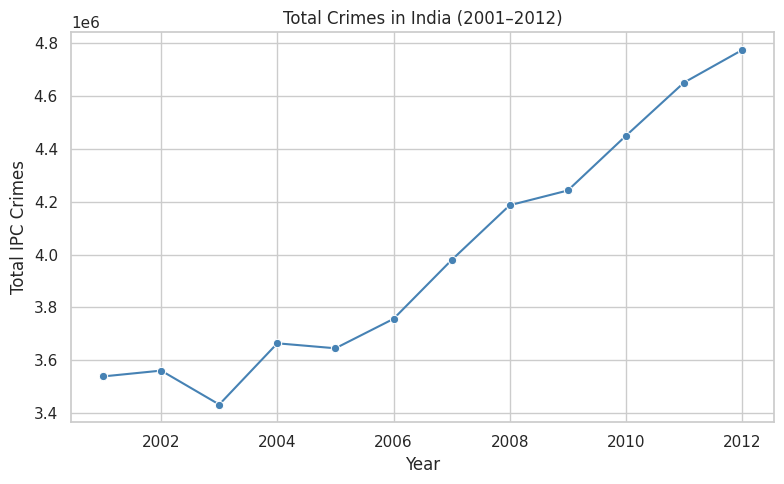

In [27]:
plt.figure(figsize=(8,5))
sns.lineplot(x="YEAR", y="sum(TOTAL IPC CRIMES)", data=pdf_year, marker="o", color="steelblue")
plt.title("Total Crimes in India (2001–2012)")
plt.xlabel("Year")
plt.ylabel("Total IPC Crimes")
plt.tight_layout()
plt.show()

/tmp/ipython-input-1820487709.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


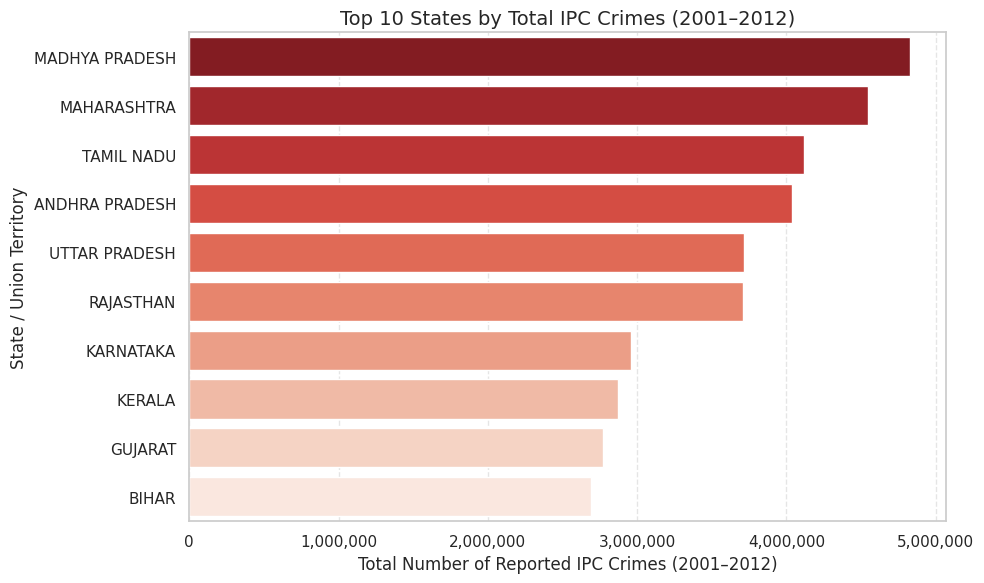

In [26]:
import matplotlib.ticker as mtick

plt.figure(figsize=(10,6))
ax = sns.barplot(
    y="STATE/UT",
    x="sum(TOTAL IPC CRIMES)",
    data=pdf_state.head(10),
    palette="Reds_r"
)

plt.title("Top 10 States by Total IPC Crimes (2001–2012)", fontsize=14)
plt.xlabel("Total Number of Reported IPC Crimes (2001–2012)", fontsize=12)
plt.ylabel("State / Union Territory", fontsize=12)

# ✅ Format x-axis numbers with commas (e.g., 100,000 → 1,000,000)
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.grid(True, axis='x', linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


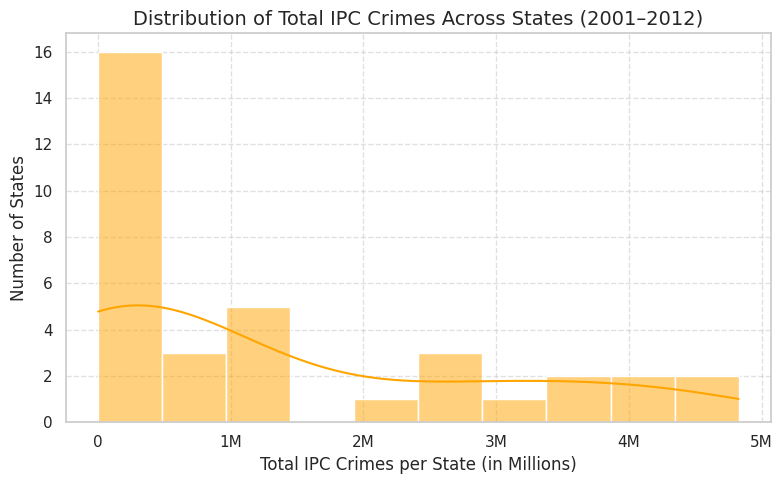

In [22]:
plt.figure(figsize=(8,5))

sns.histplot(pdf_state["sum(TOTAL IPC CRIMES)"], bins=10, kde=True, color="orange")

plt.title("Distribution of Total IPC Crimes Across States (2001–2012)", fontsize=14)
plt.xlabel("Total IPC Crimes per State (in Millions)", fontsize=12)
plt.ylabel("Number of States", fontsize=12)  # clearer y-axis label

# Format x-axis ticks clearly
plt.xticks(
    ticks=[0, 1e6, 2e6, 3e6, 4e6, 5e6],
    labels=['0', '1M', '2M', '3M', '4M', '5M']
)

plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

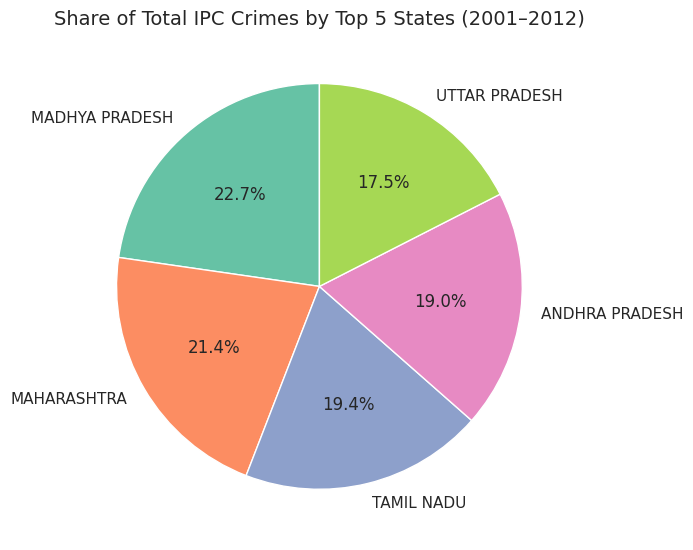

In [28]:
top5_states = pdf_state.head(5)
plt.figure(figsize=(7,7))
plt.pie(top5_states["sum(TOTAL IPC CRIMES)"],
        labels=top5_states["STATE/UT"],
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("Set2"))
plt.title("Share of Total IPC Crimes by Top 5 States (2001–2012)", fontsize=14)
plt.tight_layout()
plt.show()

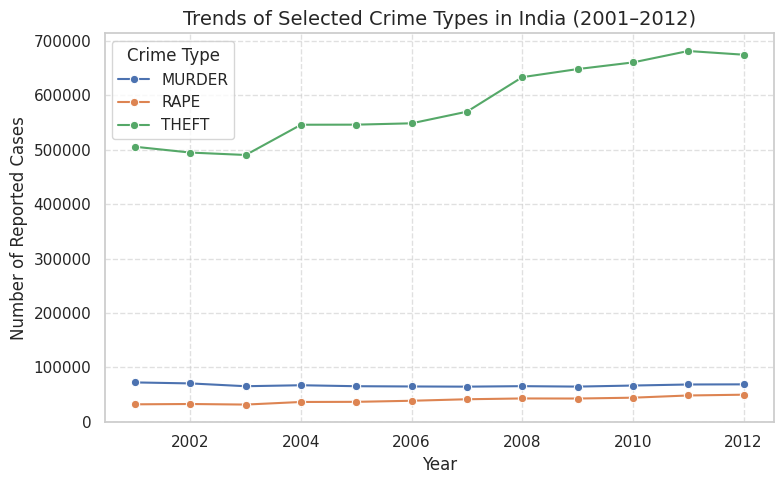

In [29]:
crime_types = ["MURDER", "RAPE", "THEFT"]
plt.figure(figsize=(8,5))
for crime in crime_types:
    yearly_crime = df.groupBy("YEAR").sum(crime).orderBy("YEAR").toPandas()
    sns.lineplot(x="YEAR", y=f"sum({crime})", data=yearly_crime, marker="o", label=crime)
plt.title("Trends of Selected Crime Types in India (2001–2012)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Reported Cases", fontsize=12)
plt.legend(title="Crime Type")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()